In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
imdb_ratings = pd.read_csv('IMDb ratings.csv', usecols=['weighted_average_vote', 'imdb_title_id'])
imdb_movies = pd.read_csv('IMDb movies.csv', usecols = ['title', 'year', 'genre', 'duration', 'country', 'imdb_title_id', 'director', 'language'])
ratings = pd.merge(imdb_movies,imdb_ratings, on='imdb_title_id', how='inner')
ratings

,imdb_title_id,title,year,genre,duration,country,language,director,weighted_average_vote
0,tt0000574,The Story of the Kelly Gang,1906,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,6.1
1,tt0001892,Den sorte drøm,1911,Drama,53,"Germany, Denmark",NaN,Urban Gad,5.9
2,tt0002101,Cleopatra,1912,"Drama, History",100,USA,English,Charles L. Gaskill,5.2
3,tt0002130,L'Inferno,1911,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",7.0
4,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...",1912,"Biography, Drama",60,USA,English,Sidney Olcott,5.7
...,...,...,...,...,...,...,...,...,...
81268,tt9903716,Jessie,2019,"Horror, Thriller",106,India,Telugu,Aswani Kumar V.,7.2
81269,tt9905412,Ottam,2019,Drama,120,India,Malayalam,Zam,7.8
81270,tt9905462,Pengalila,2019,Drama,111,India,Malayalam,T.V. Chandran,8.4
81271,tt9911774,Padmavyuhathile Abhimanyu,2019,Drama,130,India,Malayalam,Vineesh Aaradya,8.4


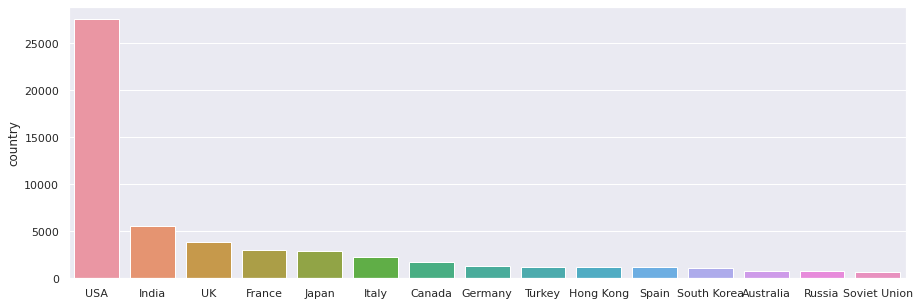

In [5]:
country_count=ratings['country'].value_counts().sort_values(ascending=False)
country_count=pd.DataFrame(country_count)
topcountries=country_count[0:15]
plt.figure(figsize=(15,5))
sns.set(style="darkgrid")
ax = sns.barplot(x = topcountries.index, y = 'country' , data = topcountries)

In [6]:
counties_ratings = {'USA': ratings['weighted_average_vote'].loc[ratings['country'] == 'USA'].mean() , 
                    'India': ratings['weighted_average_vote'].loc[ratings['country'] == 'India'].mean(), 
                    'UK': ratings['weighted_average_vote'].loc[ratings['country'] == 'UK'].mean(), 
                    'France': ratings['weighted_average_vote'].loc[ratings['country'] == 'France'].mean(), 
                    'Japan': ratings['weighted_average_vote'].loc[ratings['country'] == 'Japan'].mean(), 
                    'Italy': ratings['weighted_average_vote'].loc[ratings['country'] == 'Italy'].mean(), 
                    'Canada': ratings['weighted_average_vote'].loc[ratings['country'] == 'Canada'].mean(), 
                    'Germany': ratings['weighted_average_vote'].loc[ratings['country'] == 'Germany'].mean(), 
                    'Turkey': ratings['weighted_average_vote'].loc[ratings['country'] == 'Turkey'].mean(), 
                    'Hong Kong': ratings['weighted_average_vote'].loc[ratings['country'] == 'Hong Kong'].mean(), 
                    'Spain': ratings['weighted_average_vote'].loc[ratings['country'] == 'Spain'].mean(), 
                    'South Korea': ratings['weighted_average_vote'].loc[ratings['country'] == 'South Korea'].mean(), 
                    'Australia': ratings['weighted_average_vote'].loc[ratings['country'] == 'Australia'].mean(), 
                    'Russia': ratings['weighted_average_vote'].loc[ratings['country'] == 'Russia'].mean(),
                    'Soviet Union': ratings['weighted_average_vote'].loc[ratings['country'] == 'Soviet Union'].mean()}

counties_ratings = pd.DataFrame.from_dict(counties_ratings, orient='index')
counties_ratings = counties_ratings.rename(columns={0: 'rating'})
counties_ratings = counties_ratings.sort_values(by=['rating'])
counties_ratings

,rating
Canada,5.417750
USA,5.588720
Russia,5.703867
Australia,5.708568
UK,5.820625
Spain,5.821273
Italy,5.861350
Turkey,5.876582
Germany,5.941238
Hong Kong,6.110983


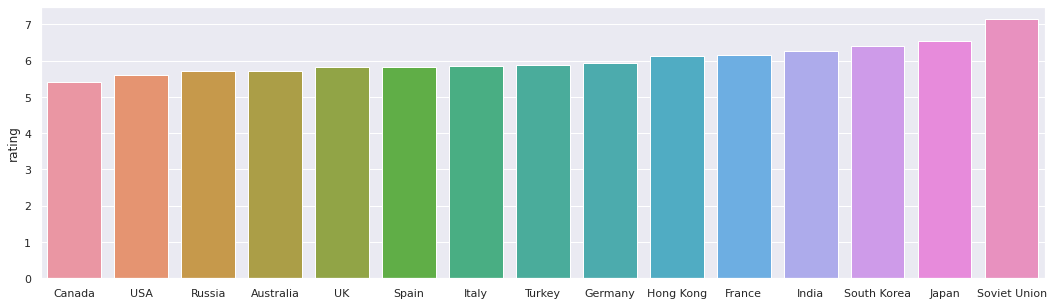

In [8]:
plt.figure(figsize=(18,5))
sns.set(style="darkgrid")
ax = sns.barplot(x = counties_ratings.index, y = 'rating', data = counties_ratings)

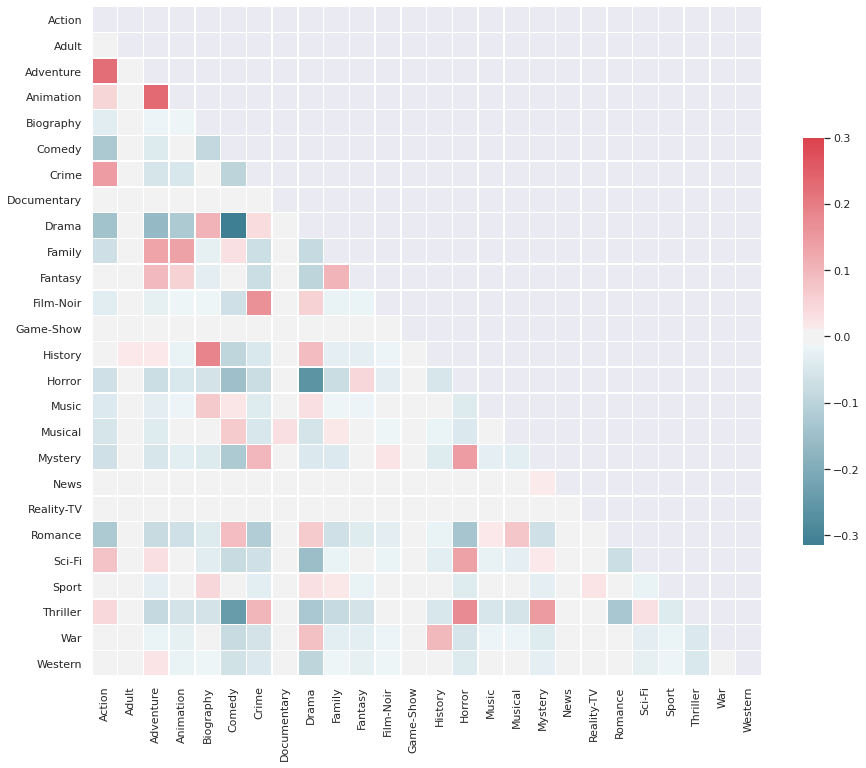

In [9]:
from sklearn.preprocessing import MultiLabelBinarizer

genre_data = ratings['genre'].astype(str).apply(lambda s : s.replace('&',' ').replace(',', ' ').split())
test = genre_data
mlb = MultiLabelBinarizer()
res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_)
corr = res.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

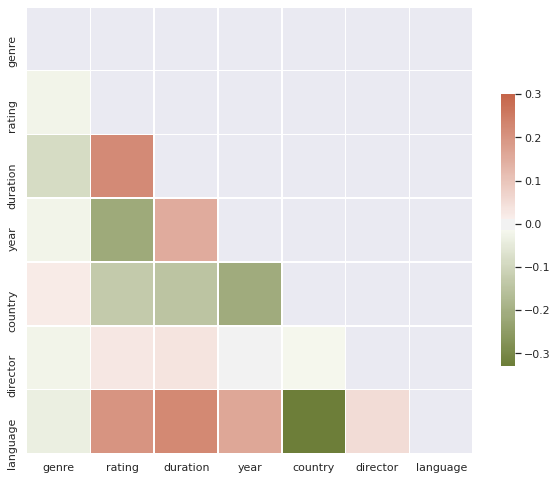

,genre,rating,duration,year,country,director,language
genre,1.000000,-0.021763,-0.086350,-0.021424,0.021050,-0.020793,-0.038733
rating,-0.021763,1.000000,0.221752,-0.213843,-0.127784,0.029102,0.201514
duration,-0.086350,0.221752,1.000000,0.150164,-0.144714,0.038391,0.224677
year,-0.021424,-0.213843,0.150164,1.000000,-0.210027,0.008848,0.162640
country,0.021050,-0.127784,-0.144714,-0.210027,1.000000,-0.012620,-0.329223
director,-0.020793,0.029102,0.038391,0.008848,-0.012620,1.000000,0.051870
language,-0.038733,0.201514,0.224677,0.162640,-0.329223,0.051870,1.000000


In [13]:
genre_ratings = {
    'genre': ratings.genre,
    'rating': ratings.weighted_average_vote,
    'duration': ratings.duration,
    'year': ratings.year,
    'country': ratings.country,
    'director': ratings.director,
    'language': ratings.language
}
genre_ratings = pd.DataFrame.from_dict(genre_ratings)
#genre_ratings['genre'] = genre_ratings['genre'].astype(str).apply(lambda s : s.replace('&',' ').replace(',', ' ').split())
genre_ratings['genre'] = genre_ratings['genre'].astype('category').cat.codes
genre_ratings['country'] = genre_ratings['country'].astype('category').cat.codes
genre_ratings['director'] = genre_ratings['director'].astype('category').cat.codes
genre_ratings['language'] = genre_ratings['language'].astype('category').cat.codes
corr = genre_ratings.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(100, 21, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()
corr

In [35]:
movies_plots_data = pd.read_csv("wiki_movie_plots_deduped.csv", usecols=['Release Year','Title','Plot'])
movies_plots_data.drop_duplicates(inplace=True)
movies_plots_data = movies_plots_data.rename(columns={'Title': 'title', 'Release Year': 'release year', 'Plot': 'plot'})
ratings = ratings.rename(columns={'Release Year': 'release year'})
ratings.drop_duplicates(inplace=True)
merge_data = movies_plots_data.merge(ratings, how="inner", on=['title','release year'])
merge_data

,release year,title,plot,imdb_title_id,genre,duration,country,language,director,weighted_average_vote
0,1913,Atlantis,"Dr. Friedrich von Kammacher (Olaf Fønss), a su...",tt0002646,Drama,121,Denmark,Danish,August Blom,6.7
1,1914,Cinderella,Cinderella is a kind young woman who lives wit...,tt0003772,"Fantasy, Drama",52,USA,English,James Kirkwood,6.1
2,1914,A Florida Enchantment,"In the film, Lillian Travers, a wealthy Northe...",tt0003973,Comedy,63,USA,English,Sidney Drew,5.9
3,1914,"His Majesty, the Scarecrow of Oz",King Krewl (Raymond Russell) is a cruel dictat...,tt0004099,"Family, Fantasy, Adventure",59,USA,English,J. Farrell MacDonald,5.2
4,1914,"Home, Sweet Home",John Howard Payne leaves home and begins a car...,tt0003167,Drama,55,USA,English,D.W. Griffith,5.7
...,...,...,...,...,...,...,...,...,...,...
19084,2013,Selam,The film opens with a Senegalese boy named Kha...,tt2737018,"Drama, Romance",104,Turkey,Turkish,Levent Demirkale,6.7
19085,2014,Sivas,The film follows an eleven-year-old boy named ...,tt3894344,Drama,97,"Germany, Turkey",Turkish,Kaan Müjdeci,7.5
19086,2014,The Water Diviner,"The film begins in 1919, just after World War ...",tt3007512,"Drama, History, War",111,"Australia, USA","English, Turkish, Greek, Russian",Russell Crowe,7.0
19087,2017,Olanlar Oldu,"Zafer, a sailor living with his mother Döndü i...",tt6313158,Comedy,108,Turkey,Turkish,Hakan Algül,6.3


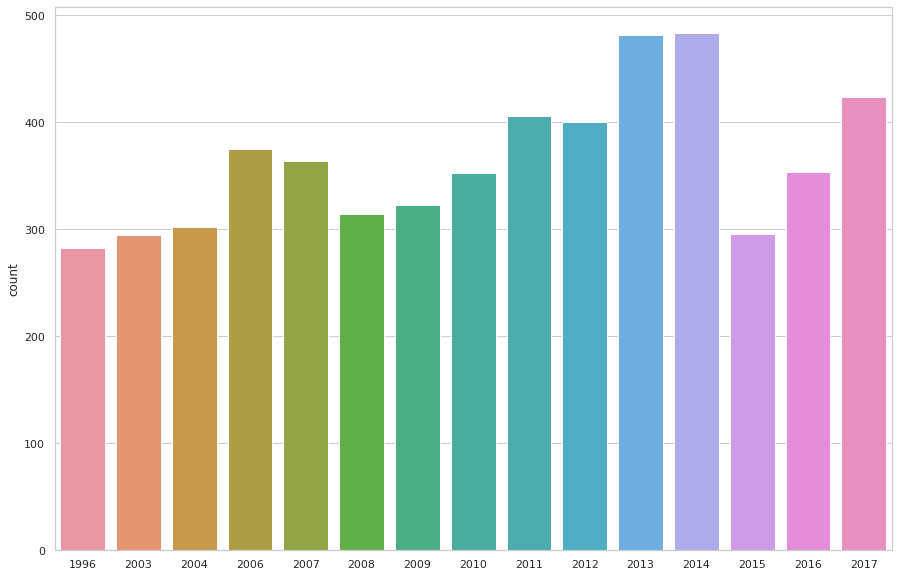

In [65]:
movies_count = merge_data['release year'].value_counts().sort_values(ascending=False)
movies_count = pd.DataFrame(movies_count).rename(columns={'release year': 'count'})
movies_for_plot = movies_count[0:15]
plt.figure(figsize=(15,10))
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
ax = sns.barplot(x=movies_for_plot.index, y="count", data=movies_for_plot)